In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [142]:
df = pd.read_csv('genre_balanced_result.csv', encoding='utf-8-sig')
print("features:", df.columns)
df

features: Index(['musicId', 'fileName', 'title', 'artist', 'album', 'genre',
       'genre_grouped', 'audio_arousal', 'audio_valence',
       'audio_emotion_quadrant_label', 'lyrics_emotion_quadrant_label',
       'match_status', 'emotion_pair', 'YT id', 'duration',
       'matched video title', 'dominant_tempo_variance',
       'tempo_transition_complexity', 'active_bpm_variance', 'pitch_range',
       'rms_variance', 'key', 'scale', 'strength', 'centroid_mean',
       'centroid_std', 'repetition_ratio_new', 'repeat_area_size_new'],
      dtype='object')


,musicId,fileName,title,artist,album,genre,genre_grouped,audio_arousal,audio_valence,audio_emotion_quadrant_label,...,active_bpm_variance,pitch_range,rms_variance,key,scale,strength,centroid_mean,centroid_std,repetition_ratio_new,repeat_area_size_new
0,832,shawn mendes - mercy,Mercy,Shawn Mendes,Illuminate (Deluxe),Pop,Pop,0.850000,0.625000,Q1,...,468.065879,197.734755,0.002682,D,major,0.840259,1621.408414,674.715958,0.503867,19640760
1,563,lady gaga - telephone (feat. beyonce),Telephone (Feat. Beyonce),Lady GaGa,2011 Grammy Nominees,Pop,Pop,0.737500,0.687500,Q1,...,152.252354,71.593067,0.017442,F,minor,0.921165,2829.429468,901.440217,0.728589,32908745
2,566,lady gaga - alejandro,Alejandro,Lady GaGa,The Fame Monster (Deluxe Edition),Pop,Pop,0.775000,0.725000,Q1,...,628.758907,49.795962,0.007560,D,major,0.888593,2614.846462,734.553745,0.838313,58784543
3,896,the weeknd - a lonely night,A Lonely Night,The Weeknd,Starboy,R&B,Pop,0.761364,0.636364,Q1,...,61.665772,68.463995,0.011962,G,minor,0.897622,2099.304427,774.934675,0.785448,35357603
4,753,panic! at the disco - death of a bachelor,Death Of A Bachelor,Panic! At The Disco,Death Of A Bachelor,Pop Rock,Pop,0.762500,0.625000,Q1,...,828.706793,12.375355,0.016396,C,major,0.892193,2166.200302,1006.554922,0.376275,15397022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,647,maren morris - i could use a love song,I Could Use a Love Song,Maren Morris,Hero,Country,Country,0.562500,0.612500,Q3,...,774.611482,53.858564,0.013348,F#,major,0.914240,1959.776181,900.460994,0.508548,18123589
196,67,bishop briggs - river,River,Bishop Briggs,River,Alternative Rock,Rock,0.800000,0.587500,Q2,...,500.977220,74.795278,0.016372,F,major,0.790208,2263.538508,843.161577,0.359167,15274397
197,560,lcd soundsystem - call the police,call the police,LCD Soundsystem,call the police / american dream,Electronic Rock,Rock,0.662500,0.512500,Q2,...,820.023423,99.407387,0.003907,A,minor,0.897060,2324.335984,643.988033,0.765300,124468035
198,393,gorillaz - saturnz barz,Saturnz Barz,Gorillaz,Humanz (Deluxe),Alternative/Electronic,EDM,0.537500,0.462500,Q3,...,682.585788,2027.598131,0.010103,F#,minor,0.829589,2206.162493,874.711017,0.653350,20467872


In [143]:
df0 = df[df['emotion_pair'] == "PN"].copy()
df1 = df[df['emotion_pair'] == "NP"].copy()
df2 = df[df['emotion_pair'] == "PP"].copy()
df3 = df[df['emotion_pair'] == "NN"].copy()
df4 = df[df['match_status'] == "mismatch"].copy()
df5 = df[df['match_status'] == "match"].copy()

In [144]:
df['emotion_pair'].value_counts()

emotion_pair
PN    50
NP    50
PP    50
NN    50
Name: count, dtype: int64

In [145]:
def create_kde_plot(dfs, labels, value_cols, colors):
  n_rows, n_cols = 3, 3
  fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), sharex=False, sharey=False)
  axes = axes.flatten()


  for ax, col in zip(axes, value_cols):
      for df, label, color in zip(dfs, labels, colors):
          try:
              df[col].plot.kde(
                  ax=ax,
                  color=color,
                  linewidth=2,
                  label=label,
                  bw_method=0.5
              )
              x = ax.lines[-1].get_xdata()
              y = ax.lines[-1].get_ydata()
              ax.fill_between(x, y, color=color, alpha=0.3)

          except Exception as e:
              print(f"Skipping {col} ({label}) due to KDE error: {e}")
              continue

      ax.set_title(col)
      ax.set_xlabel(col)


  for i, ax in enumerate(axes):
      if i % n_cols == 0:
          ax.set_ylabel('Density')
      else:
          ax.set_ylabel('')


  axes[0].legend(title='group')

  plt.tight_layout()
  plt.show()

In [146]:
dfs4 = [df0, df1, df2, df3]
labels4 = ['Pos-Neg', 'Neg-Pos', 'Pos-Pos', 'Neg-Neg']
colors4  = ['tab:red', 'tab:orange', 'tab:blue', 'tab:green']

In [148]:
value_cols = [
    'dominant_tempo_variance',
    'tempo_transition_complexity', 'active_bpm_variance',
    'pitch_range',
    'rms_variance',
    'centroid_mean', 'centroid_std',
    'repeat_area_size_new', 'repetition_ratio_new',
  ]

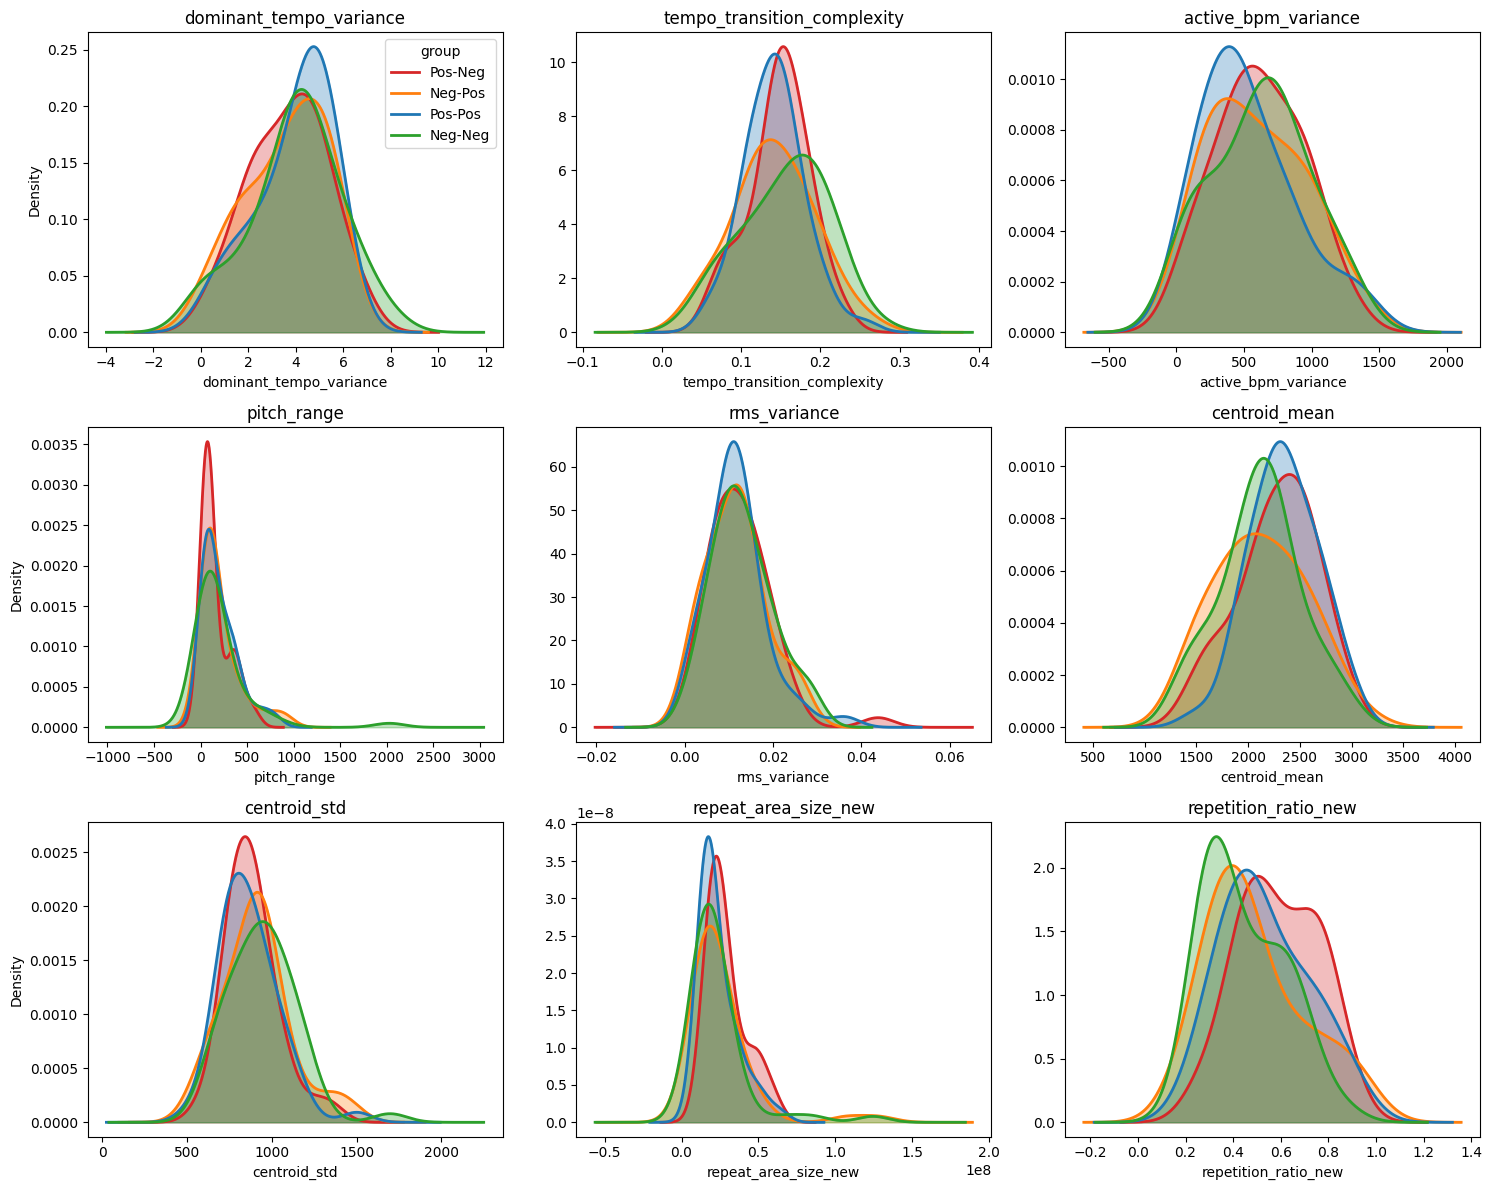

In [149]:
create_kde_plot(dfs=dfs4, labels=labels4, value_cols=value_cols, colors=colors4)

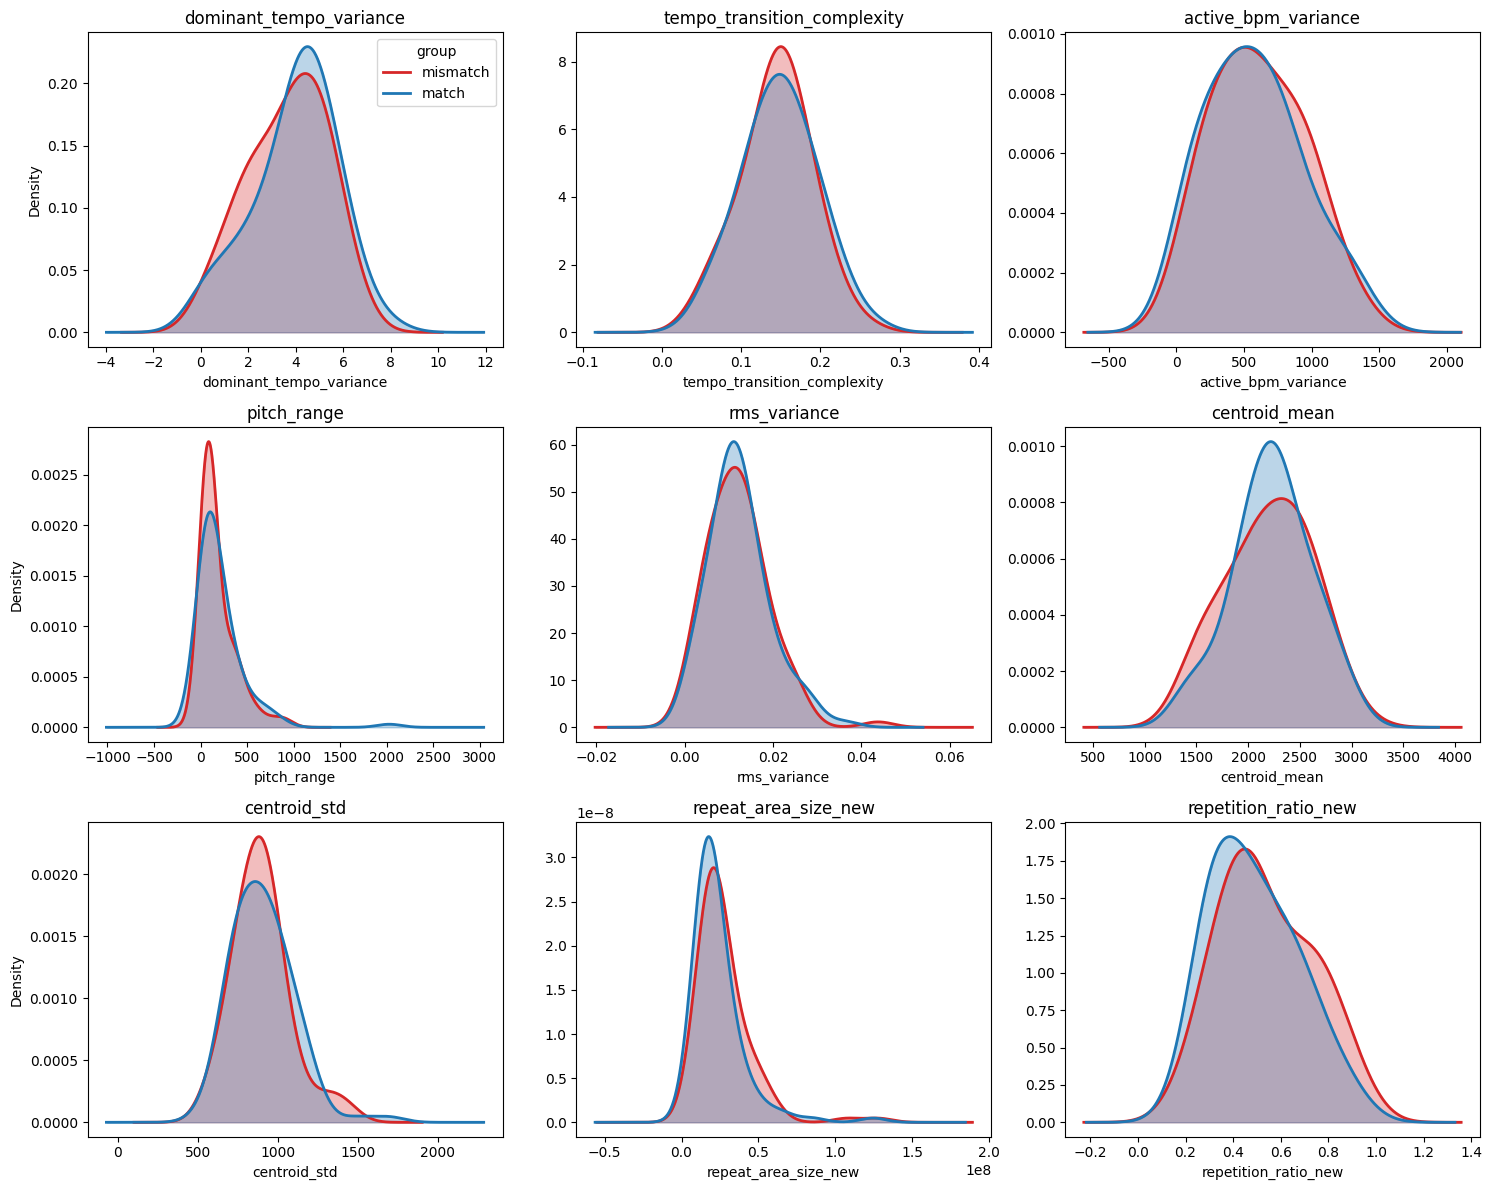

In [150]:
dfs2 = [df4, df5]
labels2 = ['mismatch', 'match']
colors2  = ['tab:red', 'tab:blue']
create_kde_plot(dfs=dfs2, labels=labels2, value_cols=value_cols, colors=colors2)

In [153]:
def create_box_plot(dfs, labels, value_cols, colors):
    n_rows, n_cols = 3, 3
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
    axes = axes.flatten()

    for ax, col in zip(axes, value_cols):
        data = []
        group = []
        for df, label in zip(dfs, labels):
            try:
                vals = df[col].dropna()
                data.extend(vals)
                group.extend([label] * len(vals))
            except Exception as e:
                print(f"Skipping {col} ({label}) due to box error: {e}")
                continue
        sns.boxplot(x=group, y=data, ax=ax, palette=colors)
        ax.set_title(col)
        ax.set_xlabel("Group")
        ax.set_ylabel(col)

    plt.tight_layout()
    plt.show()


/var/folders/w9/xctc_yps7lzfqyr9lkj0gfq40000gn/T/ipykernel_807/2530159390.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=group, y=data, ax=ax, palette=colors)
/var/folders/w9/xctc_yps7lzfqyr9lkj0gfq40000gn/T/ipykernel_807/2530159390.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=group, y=data, ax=ax, palette=colors)
/var/folders/w9/xctc_yps7lzfqyr9lkj0gfq40000gn/T/ipykernel_807/2530159390.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=group, y=data, ax=ax, palette=colors)
/var/folders/w9/xctc_yps7lzfqyr9lkj0gfq40000gn

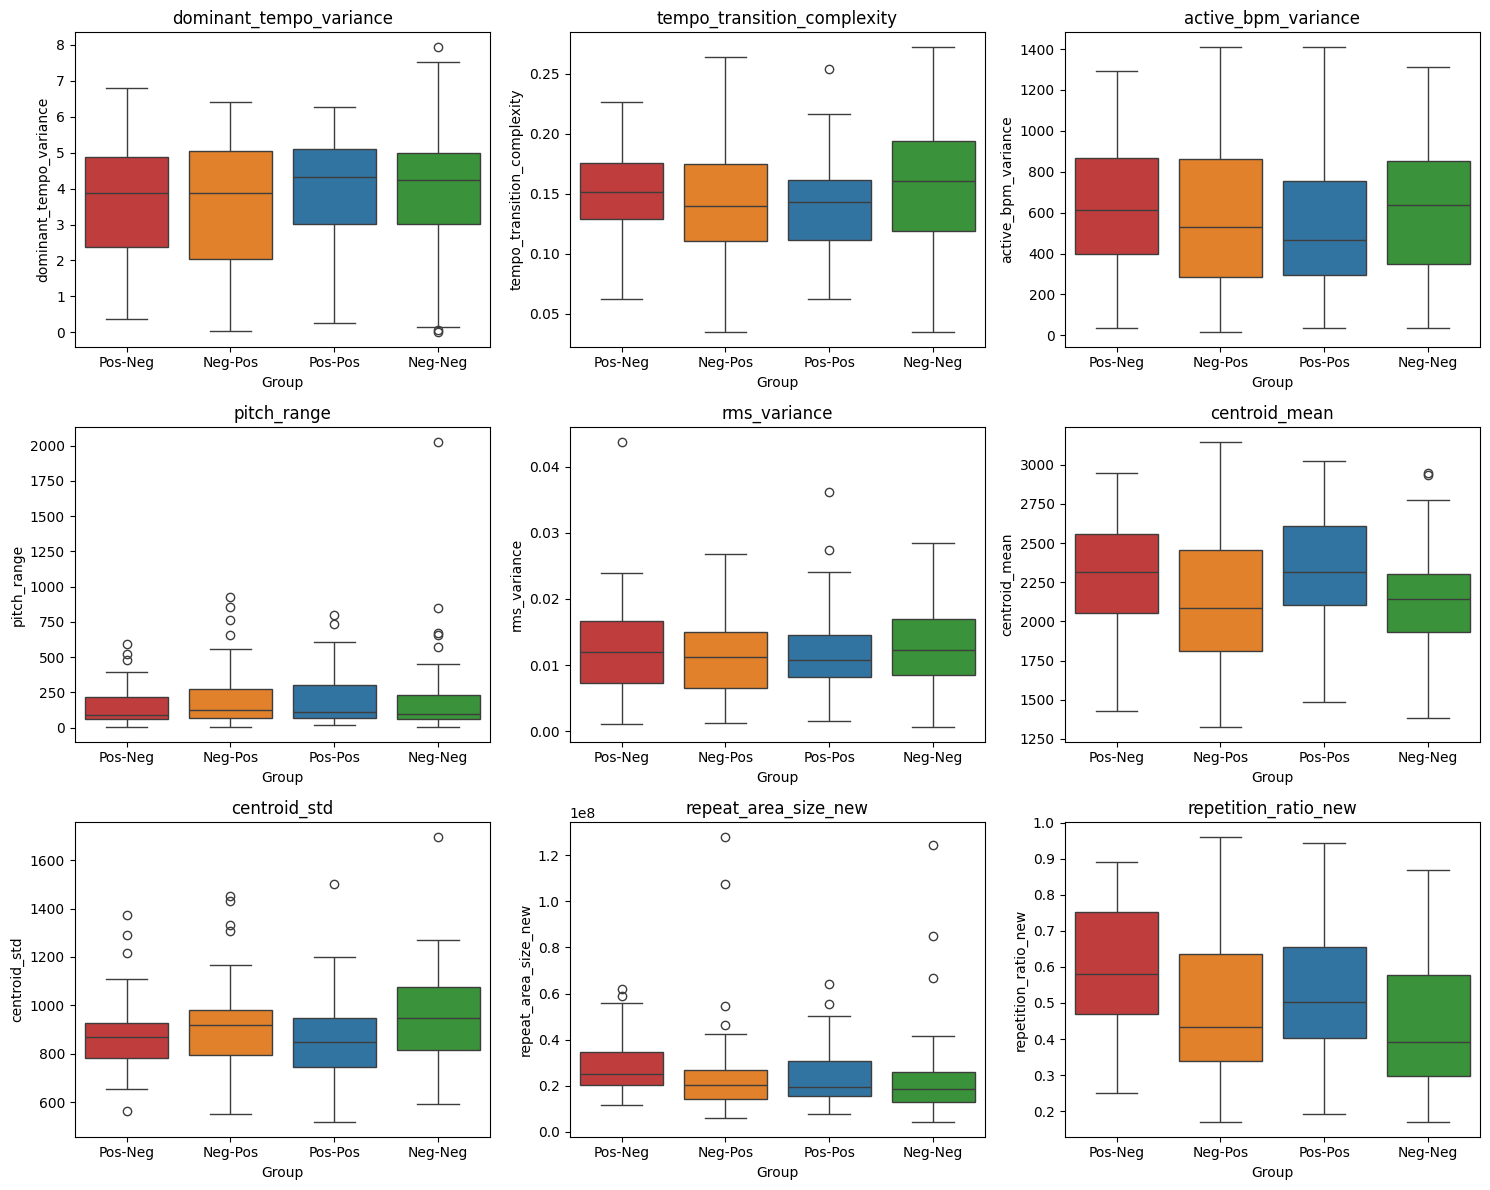

In [154]:
create_box_plot(dfs=dfs4, labels=labels4, value_cols=value_cols, colors=colors4)

/var/folders/w9/xctc_yps7lzfqyr9lkj0gfq40000gn/T/ipykernel_807/2530159390.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=group, y=data, ax=ax, palette=colors)
/var/folders/w9/xctc_yps7lzfqyr9lkj0gfq40000gn/T/ipykernel_807/2530159390.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=group, y=data, ax=ax, palette=colors)
/var/folders/w9/xctc_yps7lzfqyr9lkj0gfq40000gn/T/ipykernel_807/2530159390.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=group, y=data, ax=ax, palette=colors)
/var/folders/w9/xctc_yps7lzfqyr9lkj0gfq40000gn

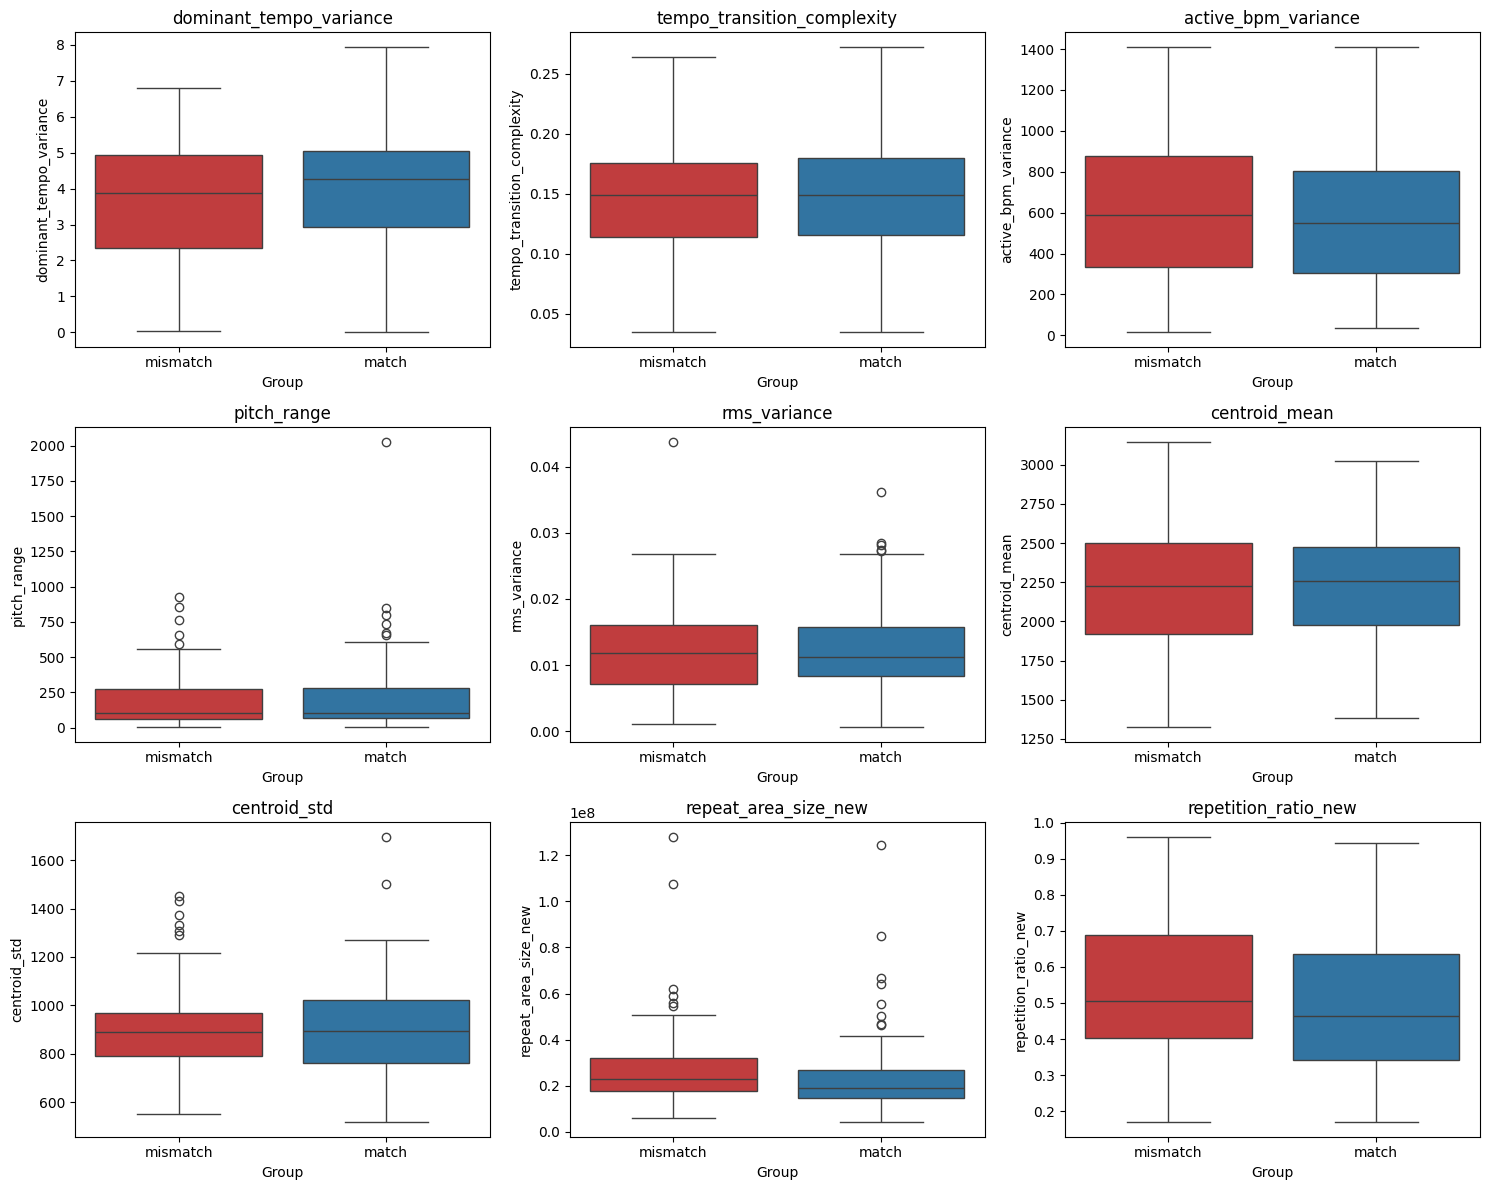

In [155]:
create_box_plot(dfs2, labels2, value_cols, colors2)

In [156]:
df['key'].unique()

array(['D', 'F', 'G', 'C', 'E', 'Ab', 'Bb', 'C#', 'B', 'A', 'Eb', 'F#'],
      dtype=object)


[Pos-Neg]
Major counts: {'C': np.int64(5), 'C#': np.int64(3), 'D': np.int64(7), 'Bb': np.int64(4), 'Eb': np.int64(2), 'E': np.int64(3), 'F': 0, 'F#': 0, 'G': np.int64(3), 'Ab': np.int64(6), 'A': np.int64(2), 'B': np.int64(4)}
Minor counts: {'C': np.int64(1), 'C#': np.int64(2), 'D': 0, 'Bb': np.int64(2), 'Eb': 0, 'E': np.int64(1), 'F': np.int64(3), 'F#': 0, 'G': np.int64(1), 'Ab': 0, 'A': np.int64(1), 'B': 0}

[Neg-Pos]
Major counts: {'C': np.int64(3), 'C#': np.int64(2), 'D': np.int64(2), 'Bb': np.int64(5), 'Eb': np.int64(1), 'E': np.int64(2), 'F': np.int64(5), 'F#': np.int64(1), 'G': np.int64(3), 'Ab': np.int64(2), 'A': np.int64(4), 'B': np.int64(3)}
Minor counts: {'C': np.int64(2), 'C#': np.int64(2), 'D': np.int64(1), 'Bb': np.int64(2), 'Eb': np.int64(1), 'E': np.int64(1), 'F': np.int64(5), 'F#': 0, 'G': 0, 'Ab': np.int64(1), 'A': np.int64(1), 'B': np.int64(1)}

[Pos-Pos]
Major counts: {'C': np.int64(1), 'C#': np.int64(3), 'D': np.int64(4), 'Bb': np.int64(2), 'Eb': np.int64(2), 'E': 

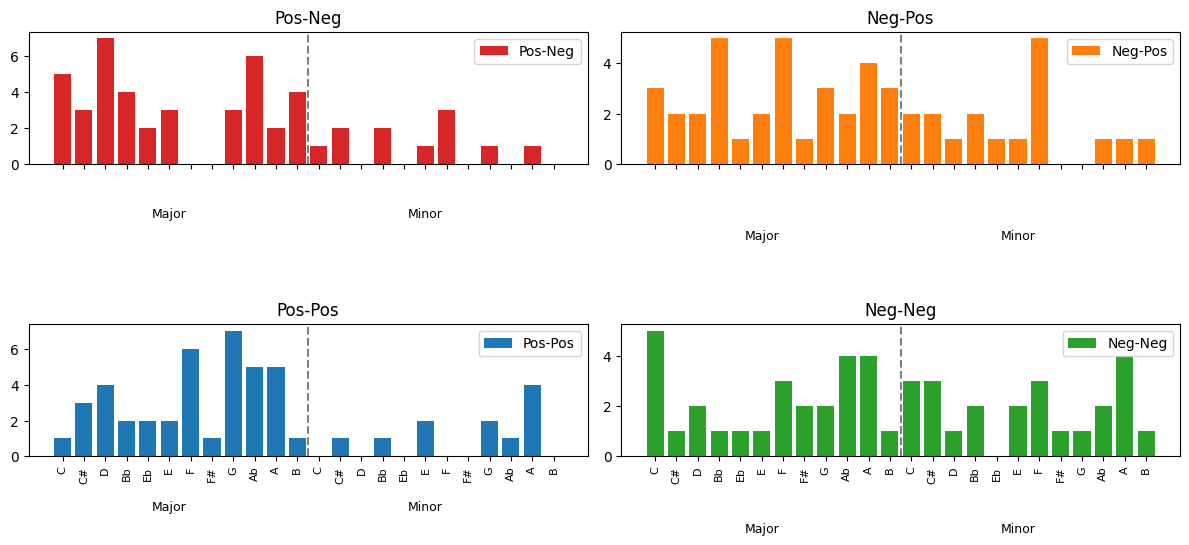

In [157]:
key_list = ['C', 'C#', 'D', 'Bb', 'Eb', 'E', 'F', 'F#', 'G', 'Ab', 'A', 'B']
key_labels = key_list + key_list

fig, axs = plt.subplots(2, 2, figsize=(12, 6), sharex=True)
axs = axs.flatten()

for i, (df, label, color) in enumerate(zip(dfs4, labels4, colors4)):
    major_counts = df[df['scale'] == 'major']['key'].value_counts()
    minor_counts = df[df['scale'] == 'minor']['key'].value_counts()

    major_vals = [major_counts.get(k, 0) for k in key_list]
    minor_vals = [minor_counts.get(k, 0) for k in key_list]
    counts = major_vals + minor_vals

    print(f"\n[{label}]")
    print("Major counts:", dict(zip(key_list, major_vals)))
    print("Minor counts:", dict(zip(key_list, minor_vals)))

    axs[i].bar(range(24), counts, color=color, label=label)
    axs[i].set_title(label)
    axs[i].legend()
    axs[i].set_xticks(range(24))
    axs[i].set_xticklabels(key_labels, rotation=90, fontsize=8)

    axs[i].axvline(11.5, color='gray', linestyle='--')
    axs[i].text(5, -3, 'Major', ha='center', fontsize=9)
    axs[i].text(17, -3, 'Minor', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

In [48]:
filtered_filenames = set(fname.strip() + ".wav" for fname in df["fileName"])

balanced_idx = [
    i for i, fname in enumerate(filename_all)
    if fname.strip() in filtered_filenames
]
print(f"Matched files: {len(balanced_idx)}")

Matched files: 200


/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/opt/a

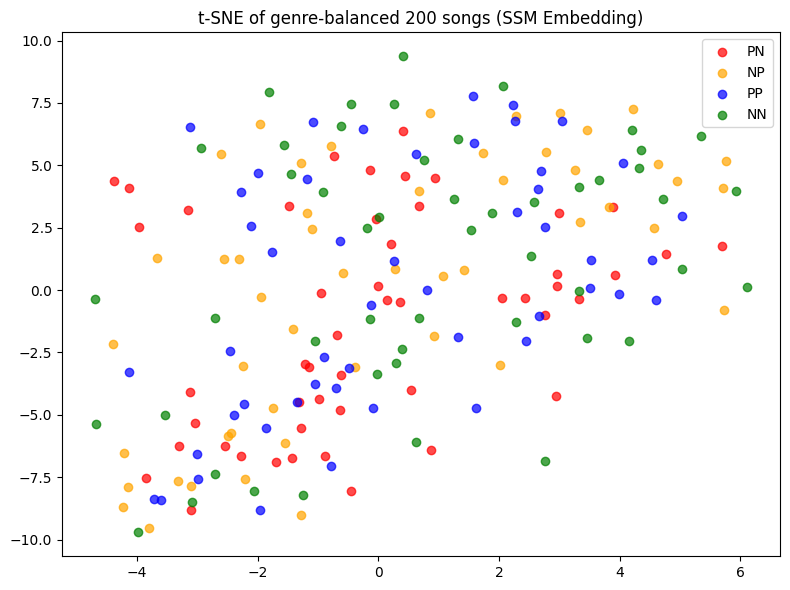

In [162]:
from sklearn.manifold import TSNE

filename = set(df["fileName"].tolist())

ssm_data = np.load("ssm_data.npz", allow_pickle=True)
z = np.load("z_np_150.npy")

z_all = z
filenames_all = ssm_data["filenames"]
filtered_filenames = set(fname.strip() + ".wav" for fname in df["fileName"])
labels_all = ssm_data["labels"]

balanced_idx = [
    i for i, fname in enumerate(filenames_all)
    if fname.strip() in filtered_filenames
]
balanced_z = z_all[balanced_idx]
balanced_filename = filenames_all[balanced_idx]
balanced_label = labels_all[balanced_idx]

label_map = {
    "0" : "PN",
    "1" : "NP",
    "2": "PP", 
    "3" : "NN",
}

color_map = {
    "0" : "red",
    "1" : "orange",
    "2" : "blue",
    "3" : "green",
}

def normalize_z2d(z_2d):
    z_min = z_2d.min(axis=0)
    z_max = z_2d.max(axis=0)
    return (z_2d - z_min) / (z_max - z_min)

tsne = TSNE(n_components=2)
z_2d = tsne.fit_transform(balanced_z)
z_2d_norm = normalize_z2d(z_2d)

plt.figure(figsize=(8, 6))
for emo in sorted(set(balanced_label)):
    idxs = [i for i, e in enumerate(balanced_label) if e == emo]
    label = label_map[emo]
    color = color_map[emo]
    plt.scatter(z_2d[idxs, 0], z_2d[idxs, 1], label=label, color=color, alpha=0.7)

plt.title("t-SNE of genre-balanced 200 songs (SSM Embedding)")
plt.legend()
plt.tight_layout()
plt.show()

/var/folders/w9/xctc_yps7lzfqyr9lkj0gfq40000gn/T/ipykernel_5323/1616935893.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


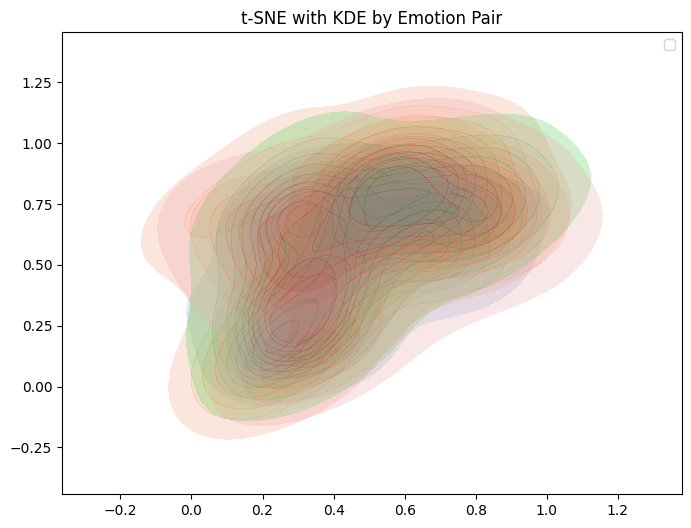

In [ ]:
plt.figure(figsize=(8, 6))
for emo in sorted(set(balanced_label)):
    idxs = [i for i, e in enumerate(balanced_label) if e == emo]
    label = label_map[emo]
    # color = color_map[emo]
    sns.kdeplot(
        x=z_2d_norm[idxs, 0], y=z_2d_norm[idxs, 1],
        fill=True,
        alpha=0.3, label=label_str
    )

plt.title("t-SNE with KDE by Emotion Pair")
plt.legend()
plt.show()

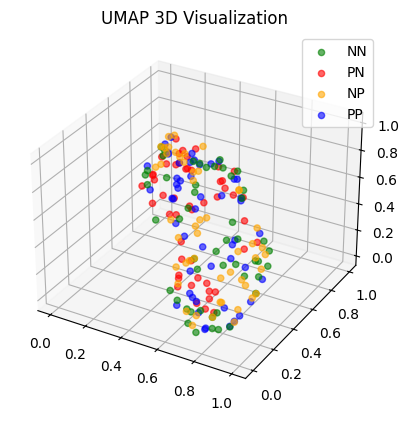

In [ ]:
from umap import UMAP
from mpl_toolkits.mplot3d import Axes3D

z_3d = UMAP(n_components=3).fit_transform(balanced_z)
z_3d_norm = normalize_z2d(z_3d)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for emo in set(balanced_label):
    idxs = [i for i, e in enumerate(balanced_label) if e == emo]
    ax.scatter(z_3d_norm[idxs, 0], z_3d_norm[idxs, 1], z_3d_norm[idxs, 2],
               color=color_map[emo], label=label_map[emo], alpha=0.6)
ax.set_title("UMAP 3D Visualization")
plt.legend()
plt.show()

In [ ]:
from scipy.spatial.distance import euclidean

centroids = {}
for label in ["0", "1", "2", "3"]:
    centroids[label] = balanced_z[balanced_label == label].mean(axis=0)

print("dist(PP, PN):", euclidean(centroids["0"], centroids["2"]))

dist(PP, PN): 0.7458300590515137


In [ ]:
centroids = {}
for label in ["0", "1", "2", "3"]:
    centroids[label] = balanced_z[balanced_label == label].mean(axis=0)

print("dist(PP, PN):", euclidean(centroids["1"], centroids["3"]))

dist(PP, PN): 0.6585027575492859


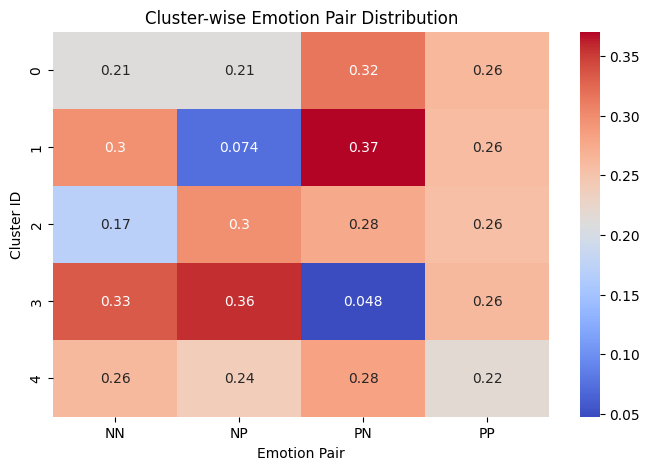

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(z_2d_norm)

df = pd.DataFrame({
    'x': z_2d_norm[:, 0],
    'y': z_2d_norm[:, 1],
    'label': balanced_label,
    'cluster': clusters
})

label_map = {
    "0" : "PN",
    "1" : "NP",
    "2": "PP", 
    "3" : "NN",
}

df['emotion'] = df['label'].map(label_map)

cluster_dist = pd.crosstab(df['cluster'], df['emotion'], normalize='index')

plt.figure(figsize=(8, 5))
sns.heatmap(cluster_dist, annot=True, cmap='coolwarm')
plt.title("Cluster-wise Emotion Pair Distribution")
plt.xlabel("Emotion Pair")
plt.ylabel("Cluster ID")
plt.show()

/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/opt/a

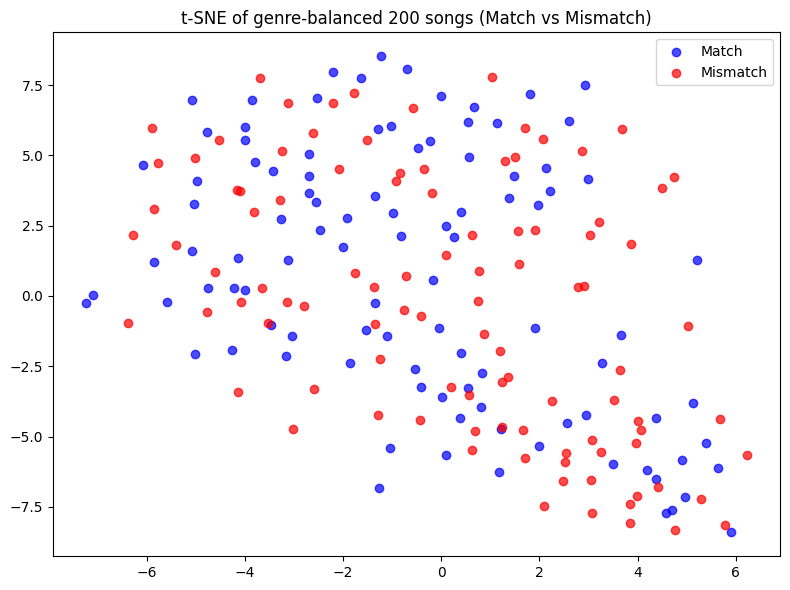

In [ ]:
match_status_map = {
    "0": "Mismatch", # PN
    "1": "Mismatch", # NP
    "2": "Match", # PP
    "3": "Match", # NN
}

color_map = {
    "Mismatch": "red",
    "Match": "blue",
}

tsne = TSNE(n_components=2, random_state=42)
z_2d = tsne.fit_transform(balanced_z)
z_2d_norm = normalize_z2d(z_2d)

match_status_labels = [match_status_map[str(lbl)] for lbl in balanced_label]

plt.figure(figsize=(8, 6))
for status in ["Match", "Mismatch"]:
    idxs = [i for i, lbl in enumerate(match_status_labels) if lbl == status]
    plt.scatter(z_2d[idxs, 0], z_2d[idxs, 1], 
                label=status, color=color_map[status], alpha=0.7)

plt.title("t-SNE of genre-balanced 200 songs (Match vs Mismatch)")
plt.legend()
plt.tight_layout()
plt.show()


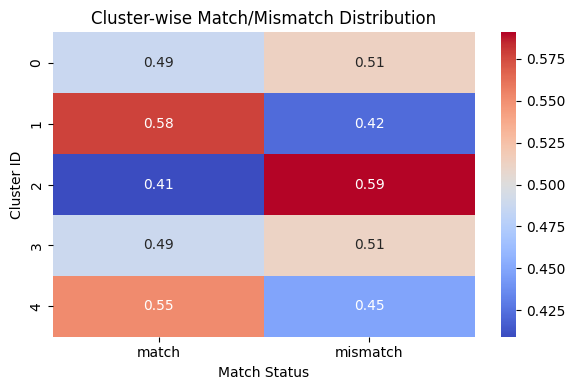

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(z_2d_norm)

df = pd.DataFrame({
    'x': z_2d_norm[:, 0],
    'y': z_2d_norm[:, 1],
    'label': balanced_label,
    'cluster': clusters
})

label_to_status = {
    "0": "mismatch", # PN
    "1": "mismatch", # NP
    "2": "match", # PP
    "3": "match" # NN
}

df['match_status'] = df['label'].map(label_to_status)

cluster_dist = pd.crosstab(df['cluster'], df['match_status'], normalize='index')

plt.figure(figsize=(6, 4))
sns.heatmap(cluster_dist, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Cluster-wise Match/Mismatch Distribution")
plt.xlabel("Match Status")
plt.ylabel("Cluster ID")
plt.tight_layout()
plt.show()

In [ ]:
import os
from tqdm.auto import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from skimage.transform import resize
from sklearn.metrics.pairwise import cosine_similarity

/opt/anaconda3/envs/project/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
def get_repeated_segments(audio_path, hop_length=512, threshold=0.8):
    y, sr = librosa.load(audio_path)
    chroma = librosa.feature.chroma_cqt(y=y, sr=sr, hop_length=hop_length)
    ssm = cosine_similarity(chroma.T)

    T = ssm.shape[0]
    repeats = []

    for i in range(T):
        for j in range(i+1, T): # 대각선 기준 위쪽
            if ssm[i, j] >= threshold:
                t1 = librosa.frames_to_time(i, sr=sr, hop_length=hop_length)
                t2 = librosa.frames_to_time(j, sr=sr, hop_length=hop_length)
                repeats.append((t1, t2))

    duration = librosa.get_duration(y=y, sr=sr)
    return repeats, duration

In [ ]:
filename_set = set(f"{f.strip()}.wav".lower() for f in df["fileName"].tolist())
repeat_infos = []

def get_repeated_segments(audio_path, hop_length=512, threshold=0.8, min_offset=5):
    y, sr = librosa.load(audio_path)
    chroma = librosa.feature.chroma_cqt(y=y, sr=sr, hop_length=hop_length)
    ssm = cosine_similarity(chroma.T)  # (T, T)
    T = ssm.shape[0]
    repeats = []

    # 시간 = frame * hop / sr
    for i in range(T):
        for j in range(i + min_offset, T): # 최소 offset 이상 떨어진 frame만 비교
            if ssm[i, j] >= threshold:
                t1 = i * hop_length / sr
                t2 = j * hop_length / sr
                repeats.append((t1, t2))

    duration = librosa.get_duration(y=y, sr=sr)
    return repeats, duration

for label in ["0", "1", "2", "3"]:
    dir_path = os.path.join("temp_wavs", label)
    for fname in tqdm(os.listdir(dir_path), desc=f"Processing temp_wavs/{label}"):
        if not fname.endswith(".wav"):
            continue
        if fname.strip().lower() not in filename_set:
            continue

        path = os.path.join(dir_path, fname)

        try:
            repeats, dur = get_repeated_segments(path)
            repeat_infos.append({
                "fileName": fname,
                "label": label,
                "repeat_count": len(repeats),
                "duration": dur,
                "repeat_ratio": len(repeats) / dur if dur > 0 else 0,
            })
            
        except Exception as e:
            print(f"[오류] {fname}: {e}")

Processing temp_wavs/0:   0%|          | 0/100 [00:00<?, ?it/s]/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
Processing temp_wavs/0:   3%|▎         | 3/100 [00:05<02:46,  1.72s/it]/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invali

: 

In [ ]:
repeat_infos = []

def get_repetition_vector(audio_path, n_bins=100, hop_length=512, threshold=0.8, min_offset=5):
    y, sr = librosa.load(audio_path)
    chroma = librosa.feature.chroma_cqt(y=y, sr=sr, hop_length=hop_length)
    ssm = cosine_similarity(chroma.T)
    T = ssm.shape[0]
    duration = librosa.get_duration(y=y, sr=sr)
    vec = np.zeros(n_bins)

    for i in range(T):
        for j in range(i + min_offset, T):
            if ssm[i, j] >= threshold:
                t1 = i * hop_length / sr
                t2 = j * hop_length / sr
                start_idx = int((t1 / duration) * n_bins)
                end_idx = int((t2 / duration) * n_bins)
                end_idx = min(end_idx, n_bins - 1)
                vec[start_idx:end_idx + 1] += 1

    return vec, duration

for label in ["0", "1", "2", "3"]:
    dir_path = os.path.join("temp_wavs", label)
    for fname in tqdm(os.listdir(dir_path), desc=f"Processing {label}"):
        if not fname.endswith(".wav"):
            continue

        path = os.path.join(dir_path, fname)
        try:
            vec, dur = get_repetition_vector(path)
            repeat_infos.append({
                "fileName": fname,
                "label": label,
                "duration": dur,
                "repvec": vec
            })
        except Exception as e:
            print(f"[오류] {fname}: {e}")

Processing 0:   0%|          | 0/100 [00:00<?, ?it/s]/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
Processing 0:   1%|          | 1/100 [00:18<30:13, 18.32s/it]/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered 

In [ ]:
df = pd.DataFrame([
    {
        "fileName": info["fileName"],
        "label": info["label"],
        "duration": info["duration"],
        "repvec": info["repvec"].tolist()
    }
    for info in repeat_infos
])

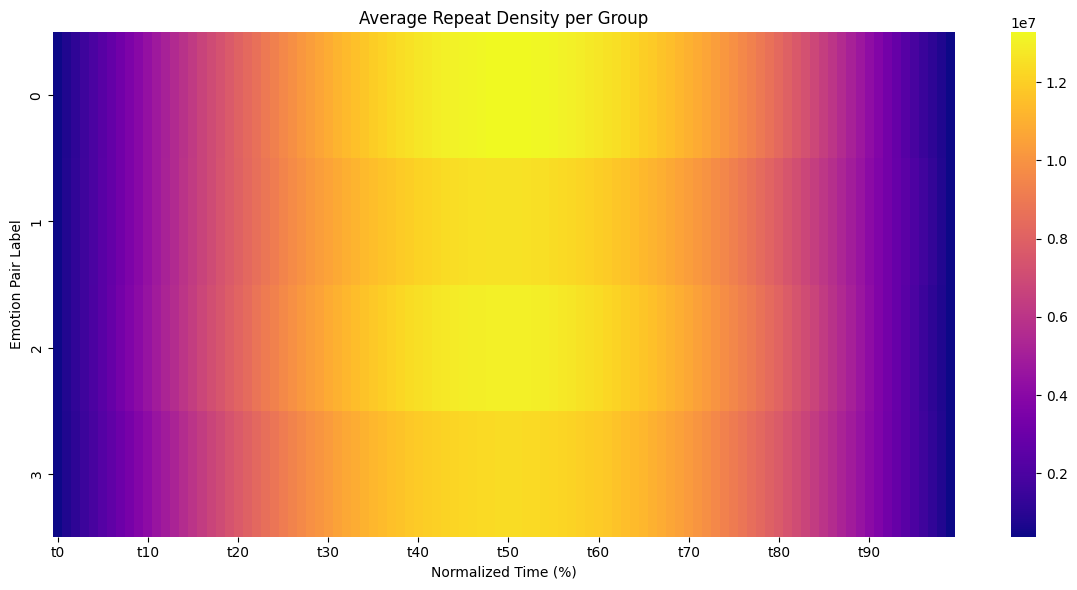

In [34]:
df_rep= pd.DataFrame([{
    "label": info["label"],
    **{f"t{i}": v for i, v in enumerate(info["repvec"])}
} for info in repeat_infos])

df_mean = df_rep.groupby("label").mean()

plt.figure(figsize=(12, 6))
sns.heatmap(df_mean, cmap="plasma", xticklabels=10, yticklabels=True)
plt.xlabel("Normalized Time (%)")
plt.ylabel("Emotion Pair Label")
plt.title("Average Repeat Density per Group")
plt.tight_layout()
plt.imshow(np.log1p(df_mean), cmap="inferno", aspect="auto")

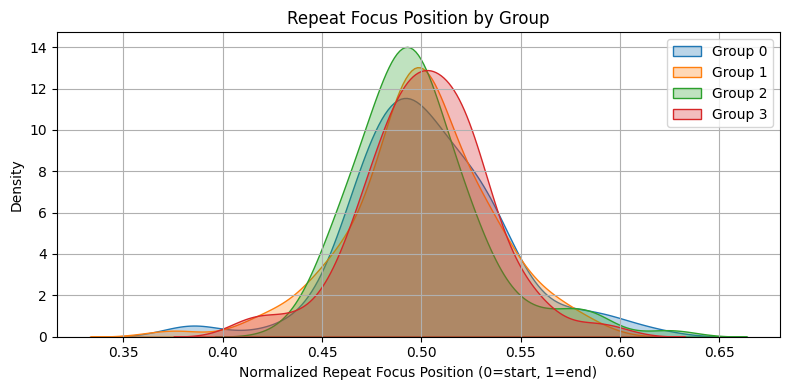

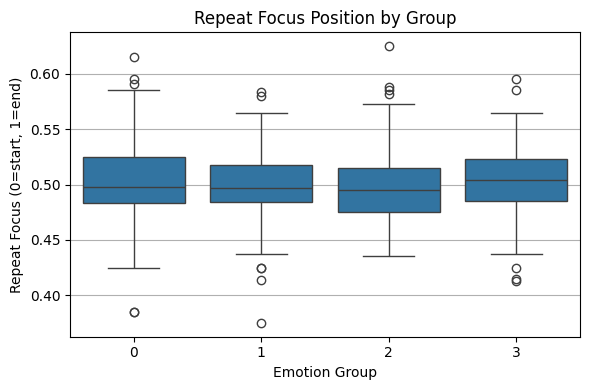

In [ ]:
def get_top_repeat_position(repvec, top_k=10):
    # 반복 강도 상위 top_k 구간의 위치 인덱스를 반환
    vec = np.array(repvec)
    top_idx = np.argsort(vec)[-top_k:]
    return np.mean(top_idx) / len(vec) # 0 ~ 1

df["rep_focus_pos"] = df["repvec"].apply(get_top_repeat_position)

def plot_repeat_focus_kde(df):
    plt.figure(figsize=(8, 4))
    for label in sorted(df["label"].unique()):
        sns.kdeplot(df[df["label"] == label]["rep_focus_pos"], label=f"Group {label}", fill=True, alpha=0.3)
    plt.xlabel("Normalized Repeat Focus Position (0=start, 1=end)")
    plt.title("Repeat Focus Position by Group")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_repeat_focus_box(df):
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="label", y="rep_focus_pos", data=df)
    plt.title("Repeat Focus Position by Group")
    plt.xlabel("Emotion Group")
    plt.ylabel("Repeat Focus (0=start, 1=end)")
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

plot_repeat_focus_kde(df)
plot_repeat_focus_box(df)

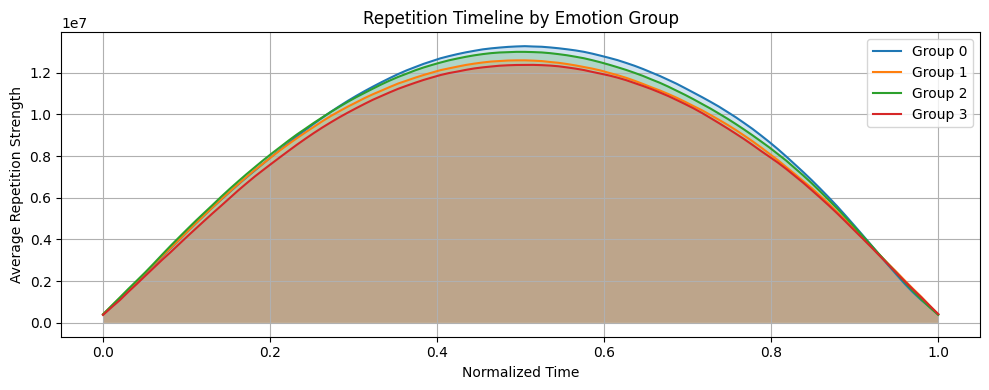

In [ ]:
import matplotlib.pyplot as plt

def plot_repetition_vector(vec, title=None):
    x = np.linspace(0, 1, len(vec))
    plt.figure(figsize=(10, 2))
    plt.plot(x, vec, linewidth=2)
    plt.fill_between(x, vec, alpha=0.3)
    plt.title(title or "Repetition Timeline")
    plt.xlabel("Normalized Time (0 ~ 1)")
    plt.ylabel("Repetition Strength")
    plt.ylim(0, max(vec) * 1.1)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

grouped = df.groupby("label")["repvec"].apply(lambda x: np.mean(np.stack(x), axis=0))

plt.figure(figsize=(10, 4))
for label, avg_vec in grouped.items():
    x = np.linspace(0, 1, len(avg_vec))
    plt.plot(x, avg_vec, label=f"Group {label}")
    plt.fill_between(x, avg_vec, alpha=0.2)

plt.title("Repetition Timeline by Emotion Group")
plt.xlabel("Normalized Time")
plt.ylabel("Average Repetition Strength")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
def plot_repetition_heatmap(vec, title=None):
    vec = np.array(vec).reshape(1, -1)
    plt.figure(figsize=(10, 1.2))
    plt.imshow(vec, aspect="auto", cmap="inferno", extent=[0, 1, 0, 1])
    plt.yticks([])
    plt.xlabel("Normalized Time")
    if title:
        plt.title(title)
    plt.colorbar(label="Repetition Strength", orientation="horizontal", pad=0.2)
    plt.tight_layout()
    plt.show()

In [18]:
def plot_repetition_step(vec, title=None):
    x = np.linspace(0, 1, len(vec))
    plt.figure(figsize=(10, 2))
    plt.step(x, vec, where='mid', linewidth=2)
    plt.title(title or "Repetition Timeline (Step)")
    plt.xlabel("Normalized Time")
    plt.ylabel("Repetition Strength")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

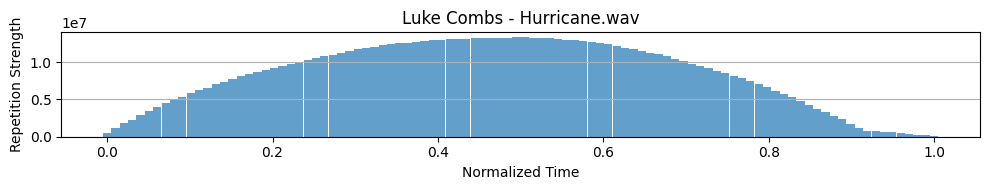

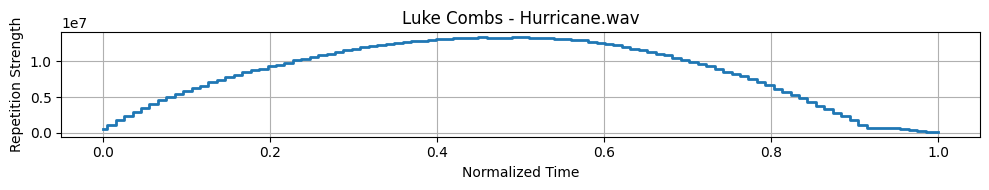

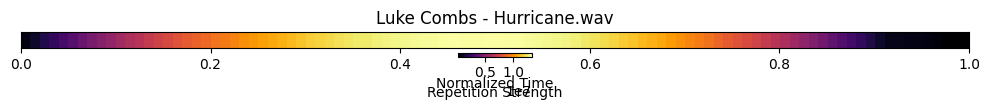

In [ ]:
row = df.iloc[0]
vec = row["repvec"]
fname = row["fileName"]

plot_repetition_step(vec, title=fname)
plot_repetition_heatmap(vec, title=fname)

/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/opt/a

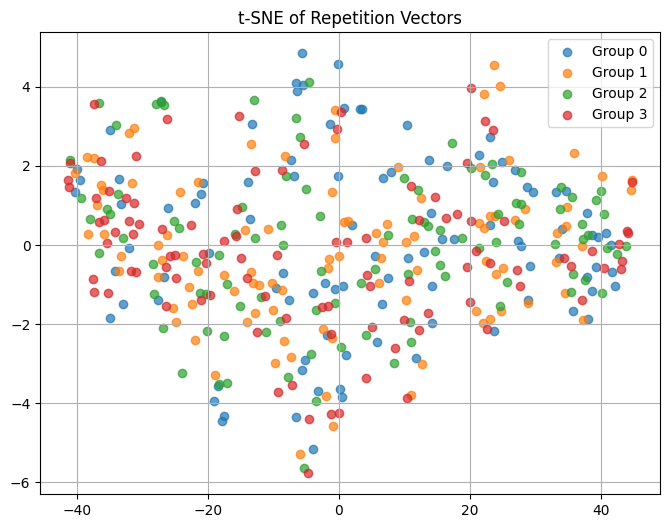

In [ ]:
from sklearn.manifold import TSNE

X = np.stack(df["repvec"].values)
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_2d = tsne.fit_transform(X)

plt.figure(figsize=(8, 6))
for label in sorted(df["label"].unique()):
    idx = df["label"] == label
    plt.scatter(X_2d[idx, 0], X_2d[idx, 1], label=f"Group {label}", alpha=0.7)

plt.title("t-SNE of Repetition Vectors")
plt.legend()
plt.grid(True)
plt.show()

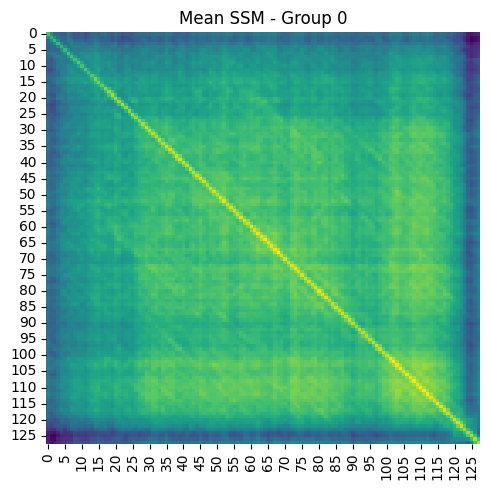

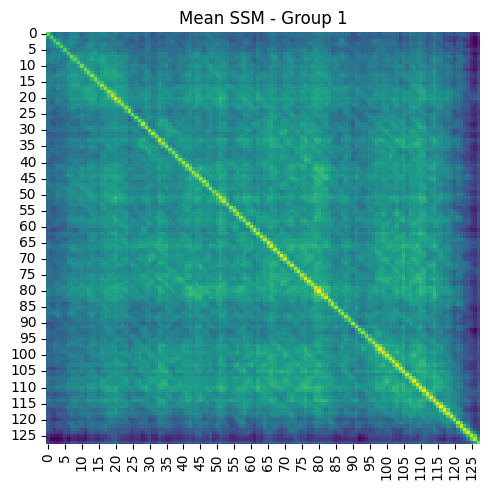

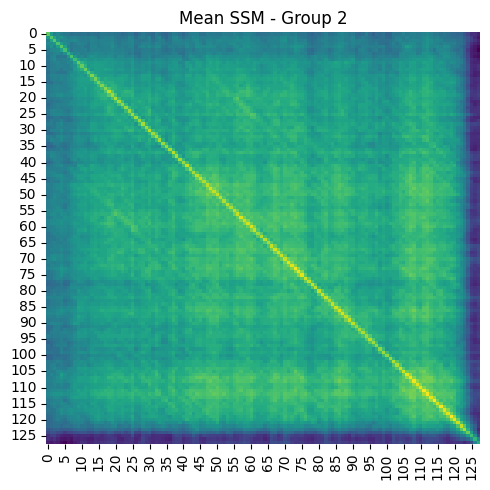

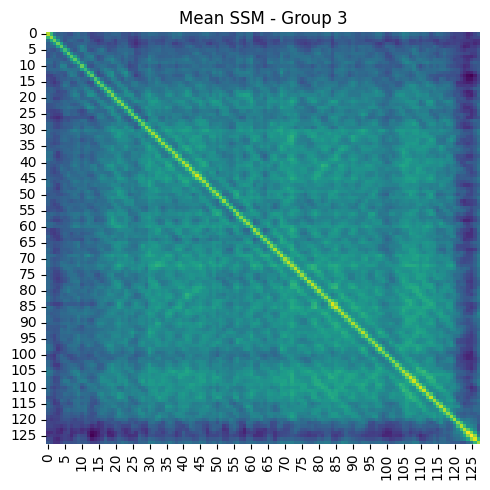

In [89]:
def sanitize_filename(fname):
    return fname.replace(".wav", "").strip().lower()

emotion2label = {"PN": 0, "NP": 1, "PP": 2, "NN": 3}

ssm_data = np.load("ssm_data.npz", allow_pickle=True)
ssms = ssm_data["imgs"]
filenames = ssm_data["filenames"]
labels = ssm_data["labels"]

df = pd.read_csv("balanced_genre.csv")
df["norm_name"] = df["fileName"].apply(sanitize_filename)
df["label"] = df["emotion_pair"].map(emotion2label)
label_map = dict(zip(df["norm_name"], df["label"]))

from collections import defaultdict

grouped_ssms = defaultdict(list)

for ssm, fname in zip(ssms, filenames):
    norm_fname = sanitize_filename(fname)
    if norm_fname in label_map:
        label = label_map[norm_fname]
        grouped_ssms[label].append(ssm)

avg_ssms = {label: np.mean(ssm_list, axis=0) for label, ssm_list in grouped_ssms.items()}

def plot_avg_ssm(ssm, label):
    if ssm.ndim == 3:
        ssm = np.squeeze(ssm)
    if ssm.ndim != 2:
        raise ValueError(f"SSM shape 이상함: {ssm.shape}")
    plt.figure(figsize=(5, 5))
    sns.heatmap(ssm, cmap="viridis", cbar=False)
    plt.title(f"Mean SSM - Group {label}")
    plt.tight_layout()
    plt.show()

for label, ssm in avg_ssms.items():
    plot_avg_ssm(ssm, label)

In [90]:
import librosa
import librosa.display

In [91]:
from skimage.transform import resize
from sklearn.metrics.pairwise import cosine_similarity

def get_resized_ssm(audio_path, target_size=128, threshold=0.8):
    y, sr = librosa.load(audio_path)

    chroma = librosa.feature.chroma_cqt(y=y, sr=sr) # (12, T)
    ssm = cosine_similarity(chroma.T) # (T, T)

    resized_ssm = resize(ssm, (target_size, target_size),
                          mode='reflect', anti_aliasing=True, preserve_range=True)

    return resized_ssm

def plot_silimilarity_matrix(similarity_matrix, save_path=f"avg_ssm_{label}.png"):
    plt.figure(figsize=(6, 5))
    plt.imshow(similarity_matrix, origin='lower', aspect='auto', cmap='magma', interpolation='nearest')
    plt.title("Mean Self-Similarity Matrix")
    plt.colorbar(label='Repetition Presence Probability')
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300)
        print(f"Saved visualization to: {save_path}")
    
    plt.close()

In [ ]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
from skimage.transform import resize
import matplotlib.pyplot as plt

def sanitize_filename(fname):
    return fname.replace(".wav", "").strip().lower()

df = pd.read_csv("balanced_genre.csv")
df["fileName"] = df["fileName"].apply(sanitize_filename)
file_set = set(df["fileName"])

emotion_map = {"PN": 0, "NP": 1, "PP": 2, "NN": 3}

target_size = 128
avg_ssms = {}

for label_name, label_idx in emotion_map.items():
    src_dir = f"temp_wavs/{label_idx}"
    resized_masks = []

    for fname in tqdm(os.listdir(src_dir), desc=f"Processing {label_name}"):
        if not fname.endswith(".wav"):
            continue

        filename_noext = sanitize_filename(fname)
        if filename_noext not in file_set:
            continue

        path = os.path.join(src_dir, fname)
        resized_matrix = get_resized_ssm(path, target_size)
        resized_masks.append(resized_matrix)

    print(f"[{label_name}] 평균에 포함된 SSM 수: {len(resized_masks)}")

    if len(resized_masks) > 0:
        mean_matrix = np.mean(resized_masks, axis=0)
        avg_ssms[label_name] = mean_matrix
        plot_silimilarity_matrix(mean_matrix, save_path=f"mean_ssm_{label_name}.png")

Processing PN:   0%|          | 0/100 [00:00<?, ?it/s]/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
Processing PN:   3%|▎         | 3/100 [00:07<03:58,  2.46s/it]/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountere

[PN] 평균에 포함된 SSM 수: 50
Saved visualization to: mean_ssm_PN.png


Processing NP:   0%|          | 0/100 [00:00<?, ?it/s]/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
Processing NP:   2%|▏         | 2/100 [00:10<08:51,  5.43s/it]/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountere

[NP] 평균에 포함된 SSM 수: 50
Saved visualization to: mean_ssm_NP.png


Processing PP:   0%|          | 0/100 [00:00<?, ?it/s]/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
Processing PP:   3%|▎         | 3/100 [00:10<05:42,  3.53s/it]/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountere

[PP] 평균에 포함된 SSM 수: 50
Saved visualization to: mean_ssm_PP.png


Processing NN:   0%|          | 0/100 [00:00<?, ?it/s]/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
Processing NN:   3%|▎         | 3/100 [00:13<07:22,  4.56s/it]/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountere

[NN] 평균에 포함된 SSM 수: 50
Saved visualization to: mean_ssm_NN.png


In [ ]:
from scipy.stats import ttest_ind

df = pd.read_csv("genre_balanced_result.csv")

# match vs mismatch
match_group = ["PP", "NN"]
mismatch_group = ["PN", "NP"]

features = [
    'dominant_tempo_variance', 'tempo_transition_complexity', 'active_bpm_variance',
     'pitch_range', 'rms_variance', 'repetition_ratio_new'
]

results = []

for feature in features:
    match_vals = df[df["emotion_pair"].isin(match_group)][feature].dropna()
    mismatch_vals = df[df["emotion_pair"].isin(mismatch_group)][feature].dropna()

    t_stat, p_val = ttest_ind(match_vals, mismatch_vals, equal_var=False)

    results.append({
        "feature": feature,
        "t_stat": round(t_stat, 4),
        "p_val": round(p_val, 5)
    })

result_df = pd.DataFrame(results)
print(result_df.sort_values("p_val"))

                       feature  t_stat    p_val
5         repetition_ratio_new -1.8808  0.06147
0      dominant_tempo_variance  1.3550  0.17696
3                  pitch_range  0.7814  0.43557
1  tempo_transition_complexity  0.6078  0.54403
2          active_bpm_variance -0.5812  0.56177
4                 rms_variance  0.2440  0.80752
